# Machine Learning approach

To meet the objective we need to select a model that fits the data properly.
Following are the steps that will be applied:

*To arrange the dataset into training set and testing set.Size of out-of-sample data is 40% of the dataset.

*To measure different evaluation metrics inorder to identify the best model.

*Model evaluation by calclating accuracy and mean-squared error.

*To predict the probability of a random data set.
 




In [8]:
#Importing libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [9]:
#Loading data set
data = pd.read_csv("SMS_Final_dataset.csv",index_col=0)
print data.head()


   Type                                            Message  Length  Exclaim  \
0     0  @@.comGo until jurong point  crazy.. Available...     117        0   
1     0                      Ok lar... Joking wif u oni...      29        0   
2     1  Free entry in 2 a wkly comp to win FA Cup fina...     155        0   
3     0  U dun say so early hor... U c already then say...      49        0   
4     0  Nah I don't think he goes to usf  he lives aro...      61        0   

   Link  Has_large_number  Uppercase_letters  
0     0                 0                  3  
1     0                 0                  2  
2     0                 1                 10  
3     0                 0                  2  
4     0                 0                  2  


In [10]:
#Data Exploration
print data.describe()


              Type       Length      Exclaim         Link  Has_large_number  \
count  5081.000000  5081.000000  5081.000000  5081.000000       5081.000000   
mean      0.135603    80.865578     0.254281     0.003739          0.108050   
std       0.342400    60.191602     0.701442     0.061042          0.310474   
min       0.000000     2.000000     0.000000     0.000000          0.000000   
25%       0.000000    36.000000     0.000000     0.000000          0.000000   
50%       0.000000    62.000000     0.000000     0.000000          0.000000   
75%       0.000000   124.000000     0.000000     0.000000          0.000000   
max       1.000000   910.000000    11.000000     1.000000          1.000000   

       Uppercase_letters  
count        5081.000000  
mean            5.645345  
std            11.673806  
min             0.000000  
25%             1.000000  
50%             2.000000  
75%             4.000000  
max           129.000000  


# Data set scaling

Scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.In this data set we are scaling below columns and bringing their values range between 0 and 1. This will help in better analysis and correlation observation.

* Length

* Exclaim

* Link

* Has_large_number

* Uppercase_letters

In [11]:
#Data scaling
scaler = preprocessing.MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()
#function for scaling columns of dataset 
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:# iterating through columns of data set
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(data[col])),columns=[col])
    return df

scaled_df = scaleColumns(data,['Length','Exclaim','Link','Has_large_number','Uppercase_letters'])
print scaled_df




      Type                                            Message    Length  \
0        0  @@.comGo until jurong point  crazy.. Available...  0.126652   
1        0                      Ok lar... Joking wif u oni...  0.029736   
2        1  Free entry in 2 a wkly comp to win FA Cup fina...  0.168502   
3        0  U dun say so early hor... U c already then say...  0.051762   
4        0  Nah I don't think he goes to usf  he lives aro...  0.064978   
5        1  FreeMsg Hey there darling it's been 3 week's n...  0.160793   
6        0  Even my brother is not like to speak with me. ...  0.082599   
7        0  As per your request 'Melle Melle (Oru Minnamin...  0.174009   
8        1  WINNER!! As a valued network customer you have...  0.171806   
9        1  Had your mobile 11 months or more? U R entitle...  0.167401   
10       0  I'm gonna be home soon and i don't want to tal...  0.117841   
11       1  SIX chances to win CASH! From 100 to 20 000 po...  0.147577   
12       1  URGENT! You h

Correlation : Checking the interdependence of variable quantities.

In [87]:
#Pairwise correlation of dataFrame columns
#print data.corr()
print scaled_df.corr()

                       Type    Length   Exclaim      Link  Has_large_number  \
Type               1.000000  0.383561  0.271129  0.154681          0.869486   
Length             0.383561  1.000000  0.270086  0.053070          0.351609   
Exclaim            0.271129  0.270086  1.000000  0.037555          0.261588   
Link               0.154681  0.053070  0.037555  1.000000          0.040997   
Has_large_number   0.869486  0.351609  0.261588  0.040997          1.000000   
Uppercase_letters  0.333624  0.383414  0.289733  0.052138          0.300006   

                   Uppercase_letters  
Type                        0.333624  
Length                      0.383414  
Exclaim                     0.289733  
Link                        0.052138  
Has_large_number            0.300006  
Uppercase_letters           1.000000  


From the correlation matrix above, all the correlation values are above 0.01, hence all variables will have influence on the outcome. As a result all the variables will be considered in the statistical approach.

Finding the mean of different columns group by 'Type' column.

In [13]:
#Mean of clumns group by type of message
print(scaled_df.groupby('Type').mean())

        Length   Exclaim      Link  Has_large_number  Uppercase_letters
Type                                                                   
0     0.076787  0.016269  0.000000          0.001138           0.031806
1     0.151046  0.066763  0.027576          0.789550           0.119981


# Scatter - Matrix

The scatter matrix is a statistic that is used to make estimates of the covariance matrix for instance of the multivariate normal distribution.

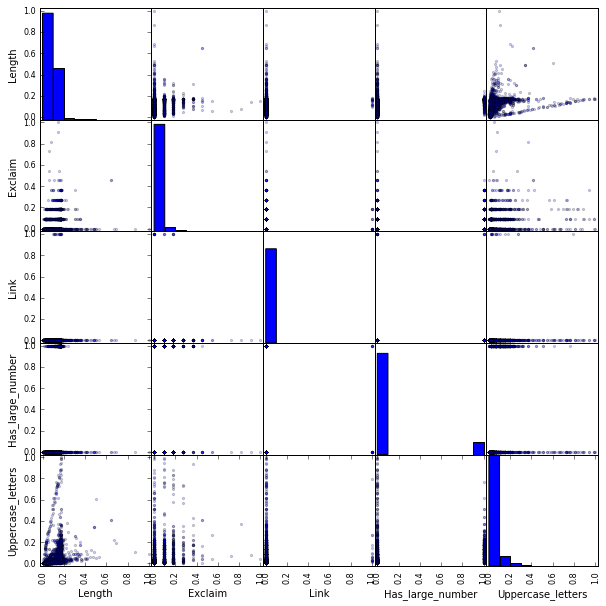

In [14]:
#Scatter matrix
from pandas.tools.plotting import scatter_matrix
%matplotlib inline
X1 = scaled_df[['Length','Exclaim','Link','Has_large_number','Uppercase_letters']]
ax = scatter_matrix(X1, alpha=0.2,figsize=(10,10), diagonal='hist')

# Model selection

As we are analyzing the data set to find the characterisitics/trends of different attributes, supervised learning approach is used to get the right analysis for each example in the data. We have to get the output as accurately as possible. A classification algorithm is required for the same.In this data set we are using two classifiers:

*Logistic regression

*Support vector classifier




In [18]:

y, X = dmatrices('Type ~ Length + Exclaim + Link + Has_large_number + Uppercase_letters',scaled_df, return_type="dataframe")
print X.columns
print X
print y

 Index([u'Intercept', u'Length', u'Exclaim', u'Link', u'Has_large_number',
       u'Uppercase_letters'],
      dtype='object')
      Intercept    Length   Exclaim  Link  Has_large_number  Uppercase_letters
0           1.0  0.126652  0.000000   0.0               0.0           0.023256
1           1.0  0.029736  0.000000   0.0               0.0           0.015504
2           1.0  0.168502  0.000000   0.0               1.0           0.077519
3           1.0  0.051762  0.000000   0.0               0.0           0.015504
4           1.0  0.064978  0.000000   0.0               0.0           0.015504
5           1.0  0.160793  0.181818   0.0               0.0           0.054264
6           1.0  0.082599  0.000000   0.0               0.0           0.015504
7           1.0  0.174009  0.000000   0.0               0.0           0.077519
8           1.0  0.171806  0.272727   0.0               1.0           0.093023
9           1.0  0.167401  0.090909   0.0               1.0           0.108527
10  

In [19]:
#Flatten y into a 1-D array
y = np.ravel(y)
print y


[ 0.  0.  1. ...,  0.  0.  0.]


# Logistic regression

This classifier gives the probability whether a given input data related to a certain class. In this project we are using this classifier to find the probability of given text message being spam or ham.

In [20]:
#Instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

#Check the score on the training set
print 'Score:',model.score(X, y)

#Examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

Score: 0.972643180476


,0,1
0,Intercept,[-1.95163950989]
1,Length,[3.59688214579]
2,Exclaim,[1.62025465094]
3,Link,[3.82227931717]
4,Has_large_number,[6.79549027813]
5,Uppercase_letters,[2.37617472683]


Evaluating the performance of a model by training and testing on the same dataset can lead to overfitting.Hence below model evaluation is based on splitting the dataset into train and validation set. We have sampled a training set while holding out 40% of the data for testing (evaluating) our classifier.

In [21]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 1234)
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100] }
grid = GridSearchCV(logreg,param_grid,cv = 3,scoring = 'accuracy')
grid.fit(X_train,y_train)

print 'Grid Scores :',(grid.best_params_)
print'Best Score : ',(grid.best_score_)
print 'Best Parameters :',(grid.best_params_)
print'Best Estimator :',(grid.best_estimator_)

C_best_score = grid.best_score_
clf_best = LogisticRegression(C = C_best_score)
clf_best.fit(X_train,y_train)
print 'Accuracy Score :', accuracy_score(clf_best.predict(X_test),y_test)
print 'Coefficients :',grid.best_estimator_.coef_ 
mse = mean_squared_error(y_test, clf_best.predict(X_test))
rmse = np.sqrt(mse)
print 'Mean-squared error', rmse

Grid Scores : {'C': 10}
Best Score :  0.970144356955
Best Parameters : {'C': 10}
Best Estimator : LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy Score : 0.97540580423
Coefficients : [[-2.10994575  6.79373216  2.18488608  5.62367487  7.9842598   2.40144642]]
Mean-squared error 0.156825367112


In [22]:
#Predicting probability of random data set being spam or ham.
print 'Probability :',grid.predict_proba([1,10,0,0,0,1])

Probability : [[ 0.  1.]]


C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [23]:
#Classification report
d = classification_report(y_test,clf_best.predict(X_test),digits=3)
print 'Classification Report \n',d


Classification Report 
             precision    recall  f1-score   support

        0.0      0.976     0.997     0.986      1769
        1.0      0.973     0.833     0.898       264

avg / total      0.975     0.975     0.975      2033



In [24]:
#Applying statsmodels function to apply logistic regression

logit = sm.Logit(y,X).fit()
print(logit.summary())
print(model.score(X, y))


         Current function value: 0.113600
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5081
Model:                          Logit   Df Residuals:                     5075
Method:                           MLE   Df Model:                            5
Date:                Tue, 04 Oct 2016   Pseudo R-squ.:                  0.7138
Time:                        18:30:55   Log-Likelihood:                -577.20
converged:                      False   LL-Null:                       -2016.7
                                        LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            -4.2865      0.138    -31.002      0.000        -4.558    -4.016
Length                5.8032      0.880     

C:\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# Support Vector Classifer (SVC)

The concept of this classifier is based on a decision plane which separates different goups in space.  In this project we are using this decision plane approach to differentiate spam messages from ham.

In [25]:
#Applying SVM on dataset
X1 = X
y1 = y
X1_train, X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size = 0.2,random_state = 1234)

In [27]:
from sklearn.grid_search import GridSearchCV
from sklearn import svm
clf= svm.SVC(probability=True)
clf.fit(X1_train, y1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
param_grid = [{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},]
grid = GridSearchCV(clf,param_grid,cv = 3,scoring = 'accuracy')
grid.fit(X1_train,y1_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [29]:
print grid.fit(X_test,y_test)
print'Best Score : ',(grid.best_score_)
print 'Best Parameters :',(grid.best_params_)
print'Best Estimator :',(grid.best_estimator_)
y1_pred = grid.predict(X1_test)
print y1_pred
print y1_test
print 'svc - accuracy score:',accuracy_score(y1_test, y1_pred)
mse = mean_squared_error(y1_test, y1_pred)
rmse = np.sqrt(mse)
print 'Mean-squared error', rmse

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)
Best Score :  0.976389572061
Best Parameters : {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}
Best Estimator : SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[ 0.  1.  0. ...,  0.  0.  1.]
[ 0.  1.  0. ...,  0.  0.  1.]
svc - accuracy score: 0.979351032448
Mean-squared error 0.14369748624


In [30]:
#Predicting probability of given data set being spam or ham.
k = grid.predict_proba([1,10,0,0,0,1])
print k

[[ 0.98973358  0.01026642]]


C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [31]:
#Classification report

d = classification_report(y1_test, y1_pred,digits=3)
print 'Classification Report \n',d


Classification Report 
             precision    recall  f1-score   support

        0.0      0.979     0.998     0.988       896
        1.0      0.981     0.843     0.907       121

avg / total      0.979     0.979     0.979      1017



# Result

*The accuracy scores ranges between .971 and .979.

*Mean squared error ranges between .143 and .167.

*Precision score ranges between 0.976 and 0.979.

*Recall score ranges between 0.975 and 0.979.

*f1-score ranges between 0.975 and 0.979.

# Future steps

Bag of words approach: In this project Bag of words approach will be added to get more clarity on the features of spam and ham messages.